In [547]:
%pip install pandas-datareader

In [548]:
import pandas as pd
import numpy as np

In [549]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [550]:
import matplotlib.pyplot as plt
%matplotlib inline

In [551]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [552]:
pip install tensorflow.python.platform

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.python.platform (from versions: none)
ERROR: No matching distribution found for tensorflow.python.platform


In [553]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [554]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [555]:
from sklearn.preprocessing import MinMaxScaler

In [556]:
pip install pd

Note: you may need to restart the kernel to use updated packages.


In [557]:
df=pd.read_csv("NSE-TATA.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,06/27/2022,39.61,39.98,38.63,39.81,"127,241"
1,06/24/2022,37.64,39.40,37.64,39.40,"602,828"
2,06/23/2022,36.91,37.57,36.57,37.56,"136,892"
3,06/22/2022,37.01,37.62,36.50,36.88,"163,082"
4,06/21/2022,36.35,37.76,36.14,37.74,"120,387"


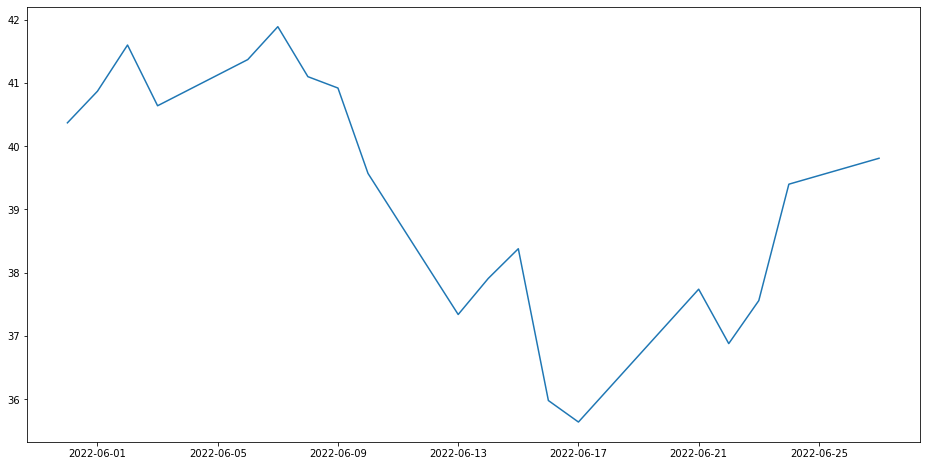

In [558]:
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [559]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [560]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

In [561]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [562]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [563]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [564]:
dataset_train = pd.read_csv('Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [565]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [566]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [567]:
X_train = []
y_train = []
for i in range(60, 1226):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [568]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [569]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [570]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [571]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [572]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [573]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [574]:
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 13s 98ms/step - loss: 0.0366
Epoch 2/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0074
Epoch 3/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0057
Epoch 4/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0057
Epoch 5/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0058
Epoch 6/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0055
Epoch 7/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0049
Epoch 8/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0044
Epoch 9/100
37/37 [==============================] - 4s 99ms/step - loss: 0.0041
Epoch 10/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0044
Epoch 11/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0040
Epoch 12/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0038
Epoch 13/100
3

In [575]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [576]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


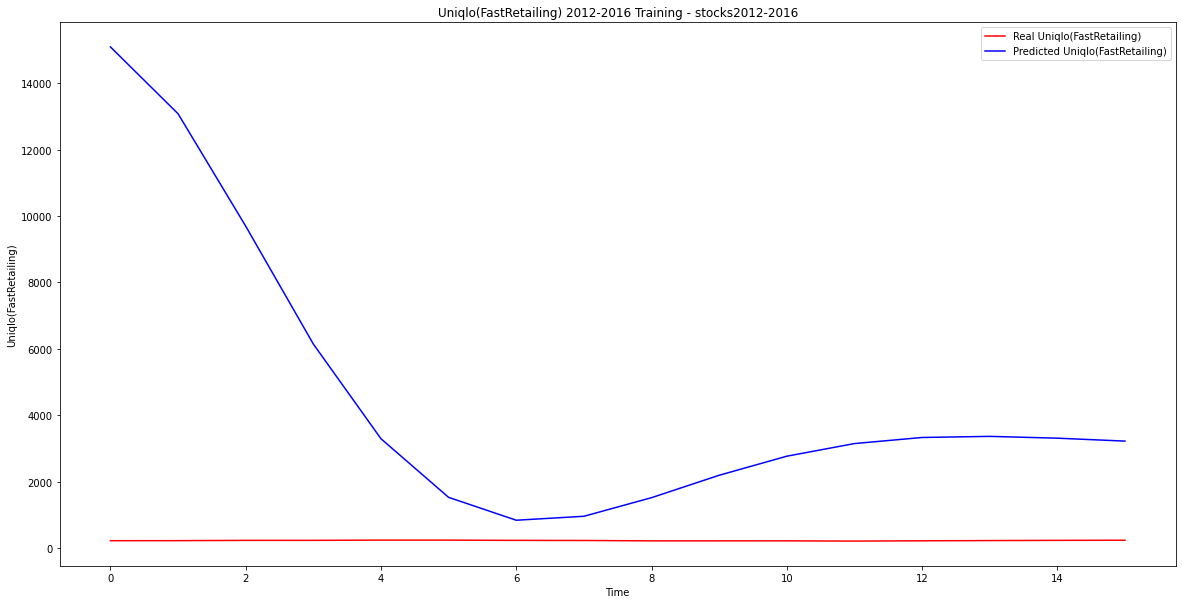

In [578]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Uniqlo(FastRetailing)')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Uniqlo(FastRetailing)')
plt.title('Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016')
plt.xlabel('Time')
plt.ylabel('Uniqlo(FastRetailing)')
plt.legend()
plt.show()